In [10]:
##EDA Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import scipy

import util_diagnostic
import util_visualization
import util_preprocessing
import util_calculation

def reload():
    importlib.reload(util_diagnostic)
    importlib.reload(util_visualization)
    importlib.reload(util_preprocessing)
    importlib.reload(util_calculation)
file_name = "House_Rent_Dataset.csv"
df = pd.read_csv(file_name)
columns = df.columns
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
reload()
util_diagnostic.getTotalUniqueColumns(df, df.columns, False)

Column : Posted On, unique: 81, dtype: object
Column : BHK, unique: 6, dtype: int64
Column : Rent, unique: 243, dtype: int64
Column : Size, unique: 615, dtype: int64
Column : Floor, unique: 480, dtype: object
Column : Area Type, unique: 3, dtype: object
Column : Area Locality, unique: 2235, dtype: object
Column : City, unique: 6, dtype: object
Column : Furnishing Status, unique: 3, dtype: object
Column : Tenant Preferred, unique: 3, dtype: object
Column : Bathroom, unique: 8, dtype: int64
Column : Point of Contact, unique: 3, dtype: object


In [3]:
pd.DataFrame(df.value_counts())

0
Posted On  BHK Rent   Size Floor           Area Type   Area Locality                 City      Furnishing Status Tenant Preferred Bathroom Point of Contact   
2022-04-13 3   260000 1800 10 out of 11    Carpet Area JVPD Scheme                   Mumbai    Furnished         Family           4        Contact Agent     1
2022-06-22 3   17000  1200 Ground out of 2 Super Area  Selaiyur                      Chennai   Unfurnished       Bachelors/Family 3        Contact Owner     1
               15000  2200 1 out of 2      Super Area  Irumbuliyur                   Chennai   Unfurnished       Bachelors        3        Contact Owner     1
                      1850 1 out of 1      Super Area  Tarapuri Colony, Secunderabad Hyderabad Semi-Furnished    Bachelors/Family 2        Contact Owner     1
               13000  900  1 out of 4      Super Area  Perambur                      Chennai   Unfurnished       Bachelors/Family 1        Contact Owner     1
...                                                                                                                                                         ..
2022-05-26 4   37000  2700 2 out of 3      Carpet Area AGCR Enclave, Anand Vihar     Delhi     Semi-Furnished    Bachelors/Family 4        Contact Agent     1
           3   80000  2000 3 out of 4      Carpet Area Sarvodaya Enclave             Delhi     Unfurnished       Bachelors/Family 3        Contact Agent     1
               69999  950  7 out of 12     Carpet Area Chembur East                  Mumbai    Unfurnished       Family           3        Contact Agent     1
               37000  1800 1 out of 4      Carpet Area Preet Vihar                   Delhi     Semi-Furnished    Bachelors/Family 3        Contact Agent     1
2022-07-11 2   12000  550  Ground out of 1 Super Area  Choolaimedu                   Chennai   Unfurnished       Bachelors/Family 2        Contact Owner     1

[4746 rows x 1 columns]

In [6]:
reload()
util_calculation.calculateIQR(df[col])

array([1.0e+00, 2.3e+04, 6.5e+02, 1.0e+00])

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


<AxesSubplot:>

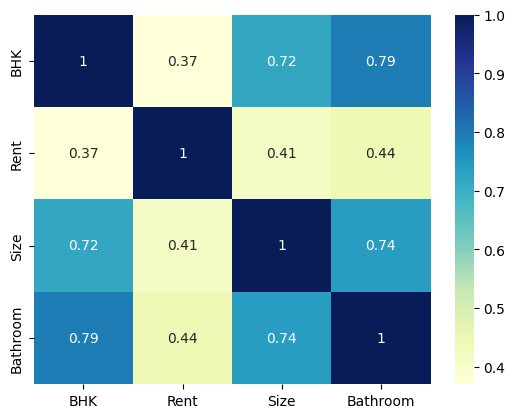

In [14]:
reload()
util_calculation.calculateCorrelationNumeric(df)


In [ ]:
from phik.report import plot_correlation_matrix

df.phik_matrix(interval_cols=interval_cols)

In [26]:
reload()
profile=util_preprocessing.profileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile.description_set["correlations"].keys()

dict_keys(['spearman', 'pearson', 'kendall', 'cramers', 'phi_k'])

Correlation Matrix for phi_k


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,1.000000,0.197162,0.140325,0.226954,0.484990,0.670580,0.206793,0.319961,0.253249,0.566340
BHK,0.197162,1.000000,0.295008,0.671970,0.294199,0.237055,0.300481,0.212961,0.781233,0.445467
Rent,0.140325,0.295008,1.000000,0.862255,0.059644,0.071189,0.036691,0.016315,0.300761,0.085540
Size,0.226954,0.671970,0.862255,1.000000,0.087740,0.217216,0.253026,0.131413,0.788165,0.257903
Area Type,0.484990,0.294199,0.059644,0.087740,1.000000,0.566124,0.132222,0.587668,0.208129,0.740210
City,0.670580,0.237055,0.071189,0.217216,0.566124,1.000000,0.416639,0.347694,0.270873,0.707368
Furnishing Status,0.206793,0.300481,0.036691,0.253026,0.132222,0.416639,1.000000,0.235885,0.228814,0.277654
Tenant Preferred,0.319961,0.212961,0.016315,0.131413,0.587668,0.347694,0.235885,1.000000,0.176242,0.470243
Bathroom,0.253249,0.781233,0.300761,0.788165,0.208129,0.270873,0.228814,0.176242,1.000000,0.364680
Point of Contact,0.566340,0.445467,0.085540,0.257903,0.740210,0.707368,0.277654,0.470243,0.364680,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for phi_k'}>

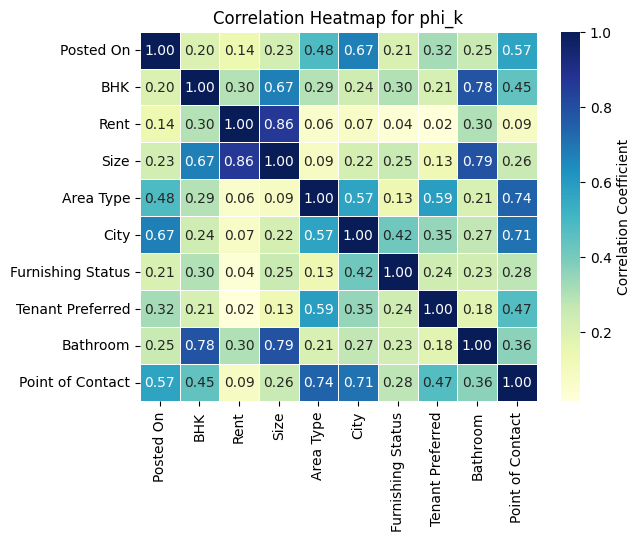

In [45]:
reload()
util_calculation.calculateCorrelationMix(df)